Dataset Columns: Index(['Transaction_ID', 'Items'], dtype='object')
   Transaction_ID                                          Items
0               1                              Pasta, Milk, Eggs
1               2                 Carrots, Bananas, Tomato Sauce
2               3                  Tomato Sauce, Carrots, Cheese
3               4                         Butter, Rice, Potatoes
4               5  Tea, Apples, Pasta, Orange Juice, Bread, Eggs
Most Frequently Purchased Items:
Cereal, Chicken                                   2
Onions, Eggs, Milk, Tea, Butter                   1
Potatoes, Tea                                     1
Potatoes, Pasta, Butter, Chicken, Sugar           1
Potatoes, Cheese, Sugar, Rice, Onions, Chicken    1
dtype: int64


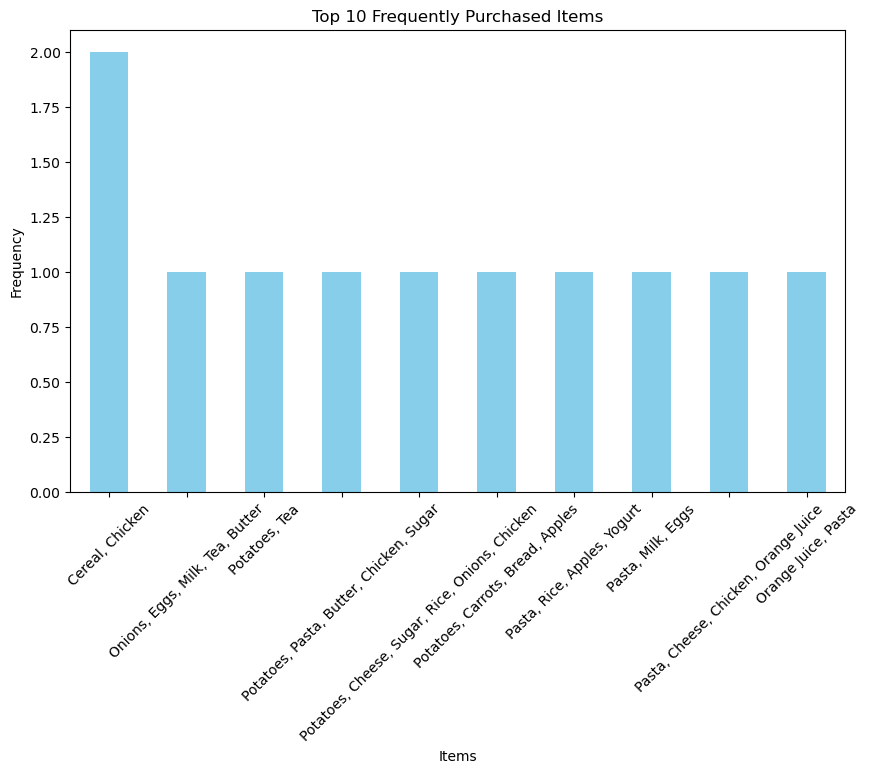

Frequent Itemsets:
Empty DataFrame
Columns: [support, itemsets]
Index: []


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
market_basket_df = pd.read_csv('market_Basket_Data.csv')  # Ensure correct dataset path
print("Dataset Columns:", market_basket_df.columns)
print(market_basket_df.head())

# Ensure expected columns exist
expected_columns = {'Transaction_ID', 'Items'}
available_columns = set(market_basket_df.columns)
if not expected_columns.issubset(available_columns):
    raise KeyError(f"Missing expected columns: {expected_columns - available_columns}. Available columns: {available_columns}")

# Convert dataset into transaction format
transactions = market_basket_df.groupby('Transaction_ID')['Items'].apply(list).tolist()

# Convert transactions into one-hot encoding format
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder()
encoded_data = encoder.fit(transactions).transform(transactions)
basket_df = pd.DataFrame(encoded_data, columns=encoder.columns_)

# Identify most frequently purchased items
item_frequencies = basket_df.sum().sort_values(ascending=False)
print("Most Frequently Purchased Items:")
print(item_frequencies.head())

# Plot the most frequently purchased items
plt.figure(figsize=(10, 6))
item_frequencies.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Top 10 Frequently Purchased Items')
plt.xticks(rotation=45)
plt.show()

# Apply Apriori Algorithm
frequent_itemsets = apriori(basket_df, min_support=0.05, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets.head())

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Identify top 5 association rules by confidence
top_rules = rules.sort_values(by='confidence', ascending=False).head(5)
print("Top 5 Association Rules:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Visualization of top association rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence with Lift as Color')
plt.show()